# Imports

In [1]:
import dd.cudd as _bdd
from game.generator import random_game
from game.visualizer import graphgame_viz

from zielonka import zielonka, ziel_with_psolver

from psolvers import buchi_solver, good_ep_solver, lay_solver, psolB

from gen import generator_gen, classical, visualizer_gen
from psolvers_gen import buchi_solver_gen

# Init game

In [7]:
bdd = _bdd.BDD()
rgame = random_game(bdd, 50,5,1,5)

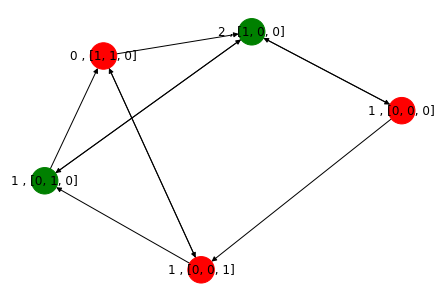

In [56]:
from game.visualizer import graphgame_viz
graphgame_viz(bdd, rgame)

# Zielonka

In [8]:
g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
(w0_ziel,w1_ziel) = zielonka(bdd, g_copy)

## Buchi solver

In [4]:
g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
(w0_buchi, w1_buchi, _) = ziel_with_psolver(bdd, g_copy, buchi_solver.buchi_solver)

PSolver winning regions not empty


In [5]:
assert(w0_buchi == w0_ziel)
assert(w1_buchi == w1_ziel)

## PsolB

In [9]:
g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
(w0_psolB, w1_psolB, _) = ziel_with_psolver(bdd, g_copy, psolB.psolB)

In [10]:
assert(w0_psolB == w0_ziel)
assert(w1_psolB == w1_ziel)

## Good Ep Solver

In [6]:
g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
(w0_good_ep, w1_good_ep, _) = ziel_with_psolver(bdd, g_copy, good_ep_solver.good_ep_solver)

PSolver winning regions not empty


In [7]:
assert(w0_good_ep == w0_ziel)
assert(w1_good_ep == w1_ziel)

## Lay Solver

In [8]:
g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
(w0_lay, w1_lay) = ziel_with_psolver(bdd, g_copy, lay_solver.lay_solver)

PSolver winning regions not empty


In [9]:
assert(w0_lay == w0_ziel)
assert(w1_lay == w1_ziel)

## Little benchmark

In [3]:
for i in range(50):
    
    bdd = _bdd.BDD()
    rgame = random_game(bdd, 500,5,1,15)
    g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
    (w0_ziel,w1_ziel) = zielonka(bdd, g_copy)
    g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
    (w0_buchi, w1_buchi, psolver_usefull) = ziel_with_psolver(bdd, g_copy, buchi_solver.buchi_solver, False)
    g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
    (w0_good_ep, w1_good_ep) = ziel_with_psolver(bdd, g_copy, good_ep_solver.good_ep_solver, False)
    g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
    (w0_lay, w1_lay) = ziel_with_psolver(bdd, g_copy, lay_solver.lay_solver, False)
    assert(w0_good_ep == w0_ziel)
    assert(w1_good_ep == w1_ziel)
    assert(w0_buchi == w0_ziel)
    assert(w1_buchi == w1_ziel)
    assert(w0_lay == w0_ziel)
    assert(w1_lay == w1_ziel)

ValueError: too many values to unpack (expected 2)

# Generalized parity games

## Init game

In [2]:
bdd = _bdd.BDD()
rgame_gen = generator_gen.random_game_gen(bdd, 5,[1,2],1,3)

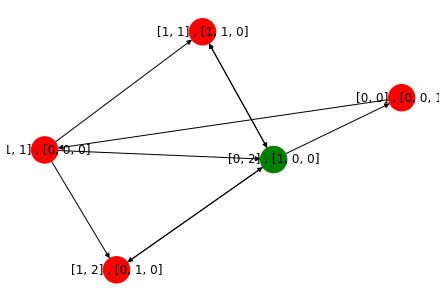

In [189]:
visualizer_gen.graphgame_viz(bdd, rgame_gen)

In [111]:
print(bdd.to_expr(rgame_gen.phi_0 | rgame_gen.phi_1))

(~ ite(x0, x2, ite(x1, x2, FALSE)))


## Classical

In [229]:
g_copy = rgame_gen.induced_game(bdd, rgame_gen.phi_0 | rgame_gen.phi_1)
w0_class, w1_class = classical.classical(bdd, g_copy)

In [227]:
print(bdd.to_expr(w0_class))
print(bdd.to_expr(w1_class))

FALSE
(~ ite(x0, ite(x1, TRUE, x2), FALSE))


## Buchi_gen PSolver

In [8]:
g_copy = rgame_gen.induced_game(bdd, rgame_gen.phi_0 | rgame_gen.phi_1)
w0_buchi, w1_buchi = classical.classical_with_psolver(bdd, g_copy, buchi_solver_gen)

NameError: name 'classical_with_psolver' is not defined

In [233]:
assert w0_buchi == w0_class
assert w1_buchi == w1_class

## Little benchmark

In [8]:
for i in range(50):
    
    bdd = _bdd.BDD()
    rgame = generator_gen.random_game_gen(bdd, 50,[1,2],1,3)
    g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
    (w0_class,w1_class) = classical.classical(bdd, g_copy)
    g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
    (w0_buchi, w1_buchi) = classical.classical_with_psolver(bdd, g_copy, buchi_solver_gen.buchi_solver_gen)
    assert(w0_buchi == w0_class)
    assert(w1_buchi == w1_class)

True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
False
False
False
False
True
False
True
False
True
False
True
False
True
False
True
False
False
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
False
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
False
False
True
False
True
False
True
False
False
True
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
